### Dependencies

In [18]:
# imports for data handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# visualization
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image, display

# tree models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### Load data

In [19]:
# load the datasets
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# add a column to indicate whether the wine is red (using int instead of boolean for .describe)
red_wine['is red'] = 1
white_wine['is red'] = 0

# combine the datasets into a single DataFrame
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# let's see it
print('rows, cols:', wine_data.shape)
wine_data.head()

rows, cols: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Descriptive Statistics

In [20]:
# let's see some stats
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<Axes: ylabel='quality'>

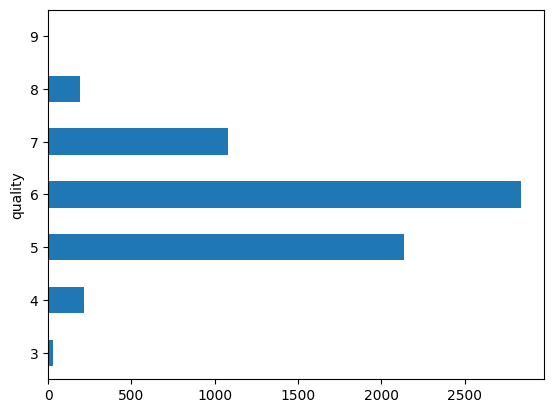

In [21]:
# check distribution of quality
wine_data['quality'].value_counts().sort_index().plot(kind='barh')

### Data preparation

In [36]:
# select features and target variable
X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality'] >=7 # good wine

# split the data into training samples and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# for trees, scaling the data will not have an effect

# let's take a look
print('Features:', X.columns.tolist())
print('Target: ', y.name)
print('Target distribution:', y.mean())
print('Train / test samples:', len(X_train), '/', len(X_test))

Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'is red']
Target:  quality
Target distribution: 0.19655225488687086
Train / test samples: 5197 / 1300


In [37]:
# define reusable evaluation function
def fit_eval(model, X_train, y_train, X_test, y_test):

    # fit the model first
    model.fit(X_train, y_train)

    # predict on both train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate train and test accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    return model, train_acc, test_acc

### Decision Tree

In [38]:
# init decision tree and evaluate performance
param_grid = {
       'max_depth': [3, 5, 7],
       'min_samples_split': [2, 4, 6]
}
dt = DecisionTreeClassifier(random_state=7)
dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# evaluate performance
dt, dt_train_acc, dt_test_acc = fit_eval(dt, X_train, y_train, X_test, y_test)

# output
print('Best parameters:', dt.best_params_)
print('Decision Tree Accuracy (train / test):', dt_train_acc, '/', dt_test_acc)

Best parameters: {'max_depth': 7, 'min_samples_split': 6}
Decision Tree Accuracy (train / test): 0.869540119299596 / 0.8161538461538461


### Random Forest

In [25]:
# init random forest and evaluate performance
param_grid = {
       'n_estimators': [150, 250, 350],
       'max_depth': [3, 5, 7],
       'min_samples_split': [2, 4, 6]
}
rf = RandomForestClassifier(n_estimators=100, random_state=7)
rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# evaluate performance
rf, rf_train_acc, rf_test_acc = fit_eval(rf, X_train, y_train, X_test, y_test)

# output
print('Best parameters:', rf.best_params_)
print('Random Forest Accuracy (train / test):', rf_train_acc, '/', rf_test_acc)

Best parameters: {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 350}
Random Forest Accuracy (train / test): 0.8835866846257456 / 0.8538461538461538


### Gradient Boosted Trees

In [26]:
# init gradient boosted trees with small hyperparameter grid search
param_grid = {
       'learning_rate': [0.05, 0.075, 0.1],
       'n_estimators': [150, 250, 350],
       'max_depth': [3, 5, 7],
       'min_samples_split': [2, 4, 6]
}
gb = GradientBoostingClassifier(n_estimators=100, random_state=7)
gb = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# evaluate performance
gb, gb_train_acc, gb_test_acc = fit_eval(gb, X_train, y_train, X_test, y_test)

# output
print('Best parameters:', gb.best_params_)
print('Gradient Boosted Accuracy (train / test):', gb_train_acc, '/', gb_test_acc)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 350}
Gradient Boosted Accuracy (train / test): 1.0 / 0.8807692307692307


### Simple Baseline

In [27]:
# define and init a simple baseline that always predict 0
class baseline:
    def fit(self, *args, **kwargs):
        pass
    def predict(self, X):
        return [0] * len(X)
# init and eval
bl = baseline()

# evaluate performance
bl, bl_train_acc, bl_test_acc = fit_eval(bl, X_train, y_train, X_test, y_test)

# output
print('Baseline Accuracy (train / test):', bl_train_acc, '/', bl_test_acc)

Baseline Accuracy (train / test): 0.8046950163555897 / 0.7984615384615384


### Model Evaluation

In [28]:
print('Decision Tree:\t\t', dt_test_acc)
print('Random Forest:\t\t', rf_test_acc)
print('Gradient Boosted:\t', gb_test_acc)
print('Baseline:\t\t', bl_test_acc)

Decision Tree:		 0.8161538461538461
Random Forest:		 0.8538461538461538
Gradient Boosted:	 0.8807692307692307
Baseline:		 0.7984615384615384


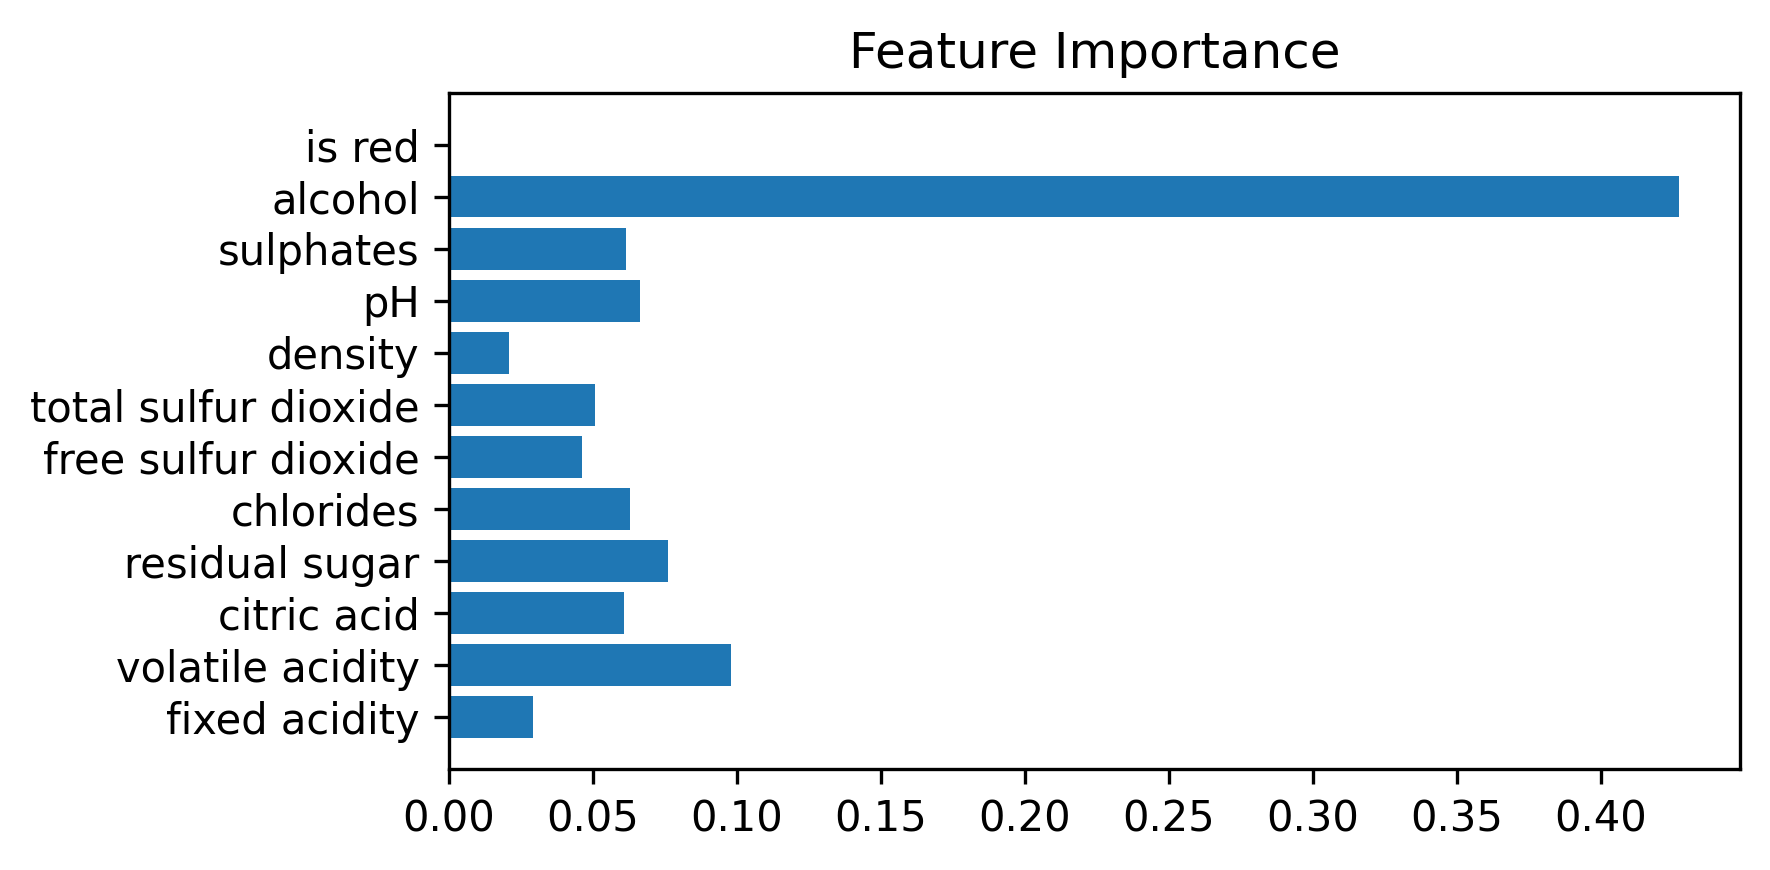

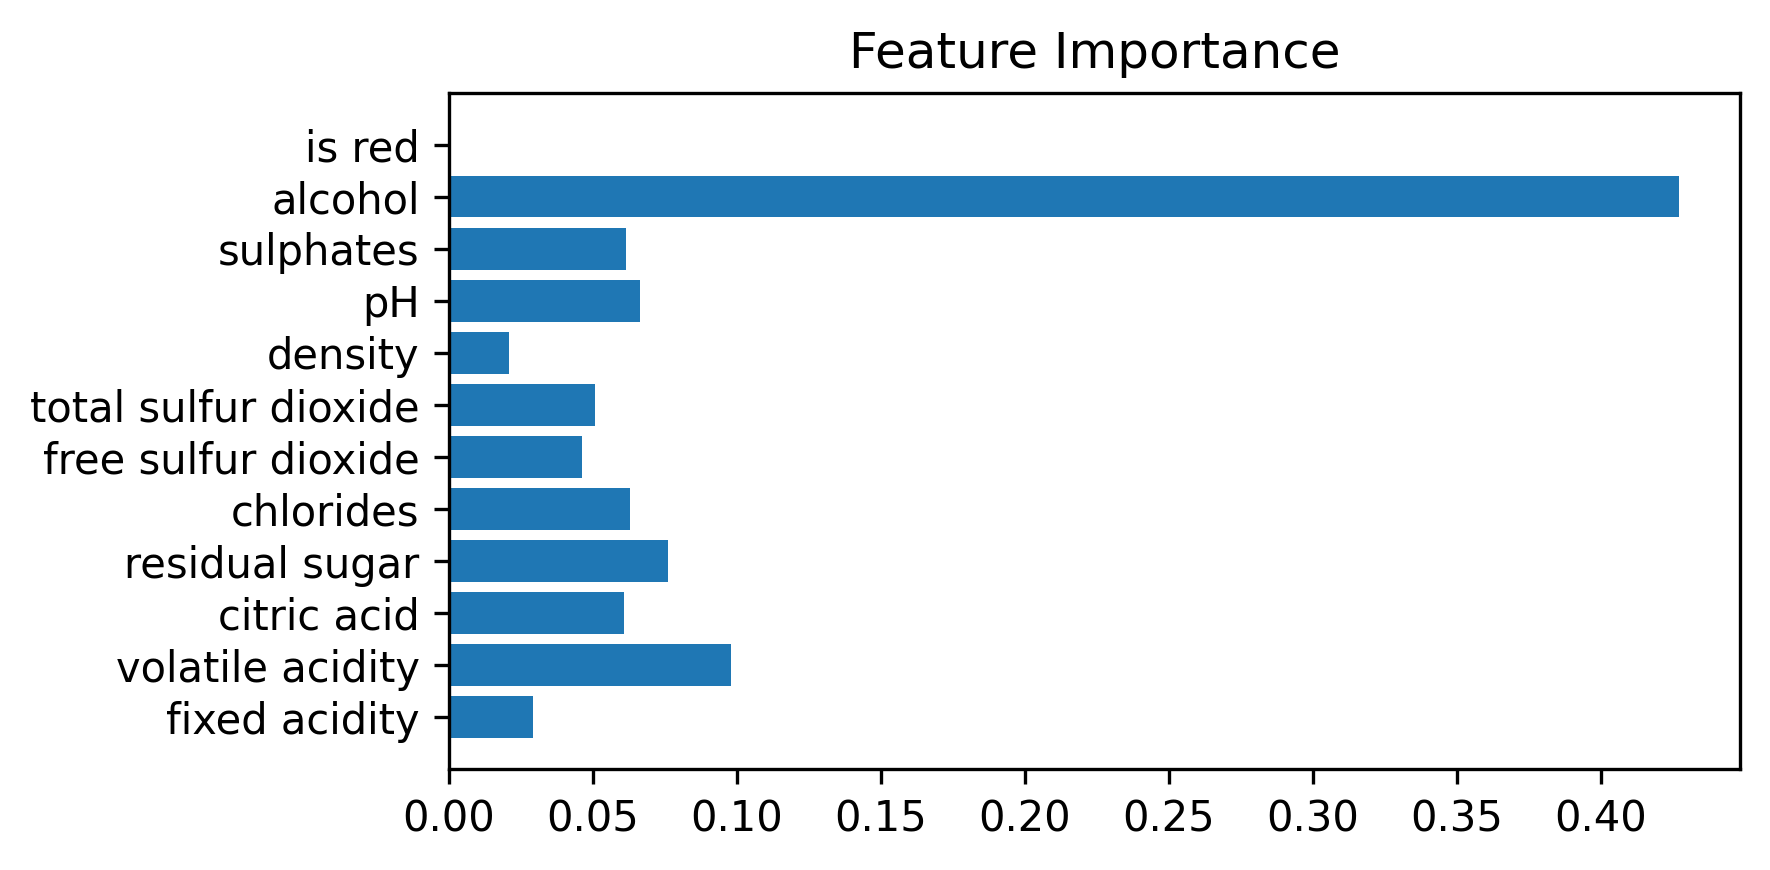

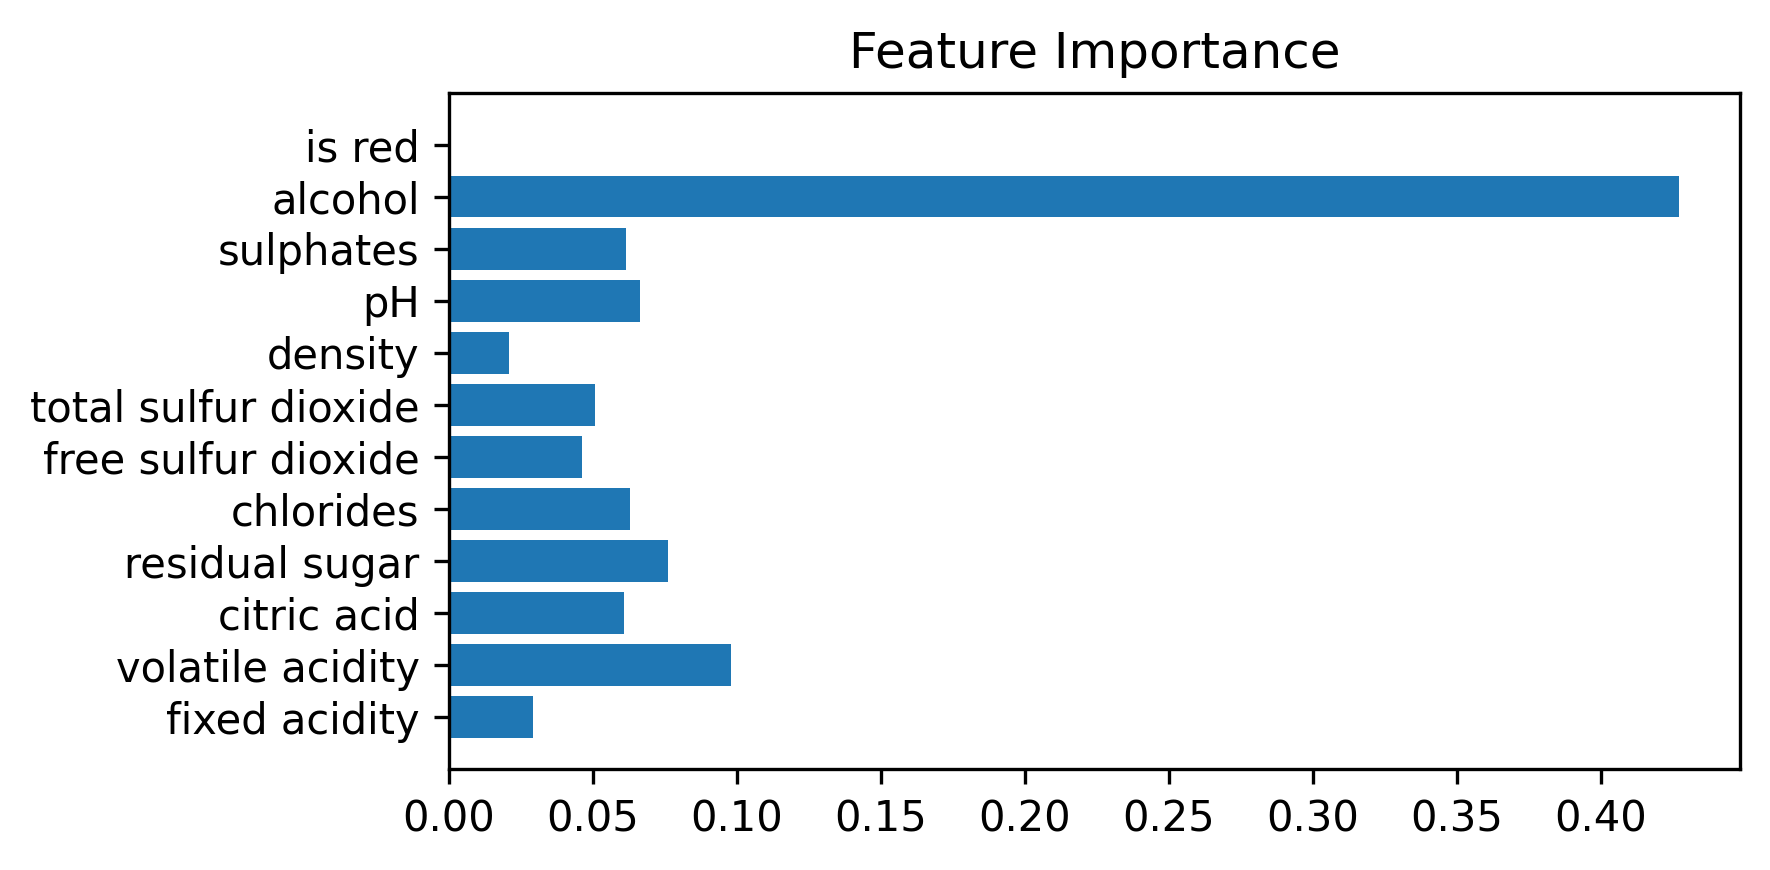

In [29]:
# for each model, create a barchart of feature importance
for name, model in {'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosted': gb}.items():
    plt.figure(figsize=(6, 3), dpi=300)
    plt.barh(X.columns, dt.best_estimator_.feature_importances_)
    plt.title(f'Feature Importance')
    plt.tight_layout()
    plt.show()

### Visualizing Trees

This needs installing of https://graphviz.org/download/ as well as Python modules graphviz and pydotplus.

In [30]:
# let's define a reusable function
def show_tree(tree, feature_names, class_names, max_depth=3):
    dot_data = export_graphviz(tree, 
                               out_file=None, 
                               feature_names=feature_names,
                               class_names=class_names,
                               filled=True,
                               rounded=True,
                               special_characters=True,
                               max_depth=max_depth)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))

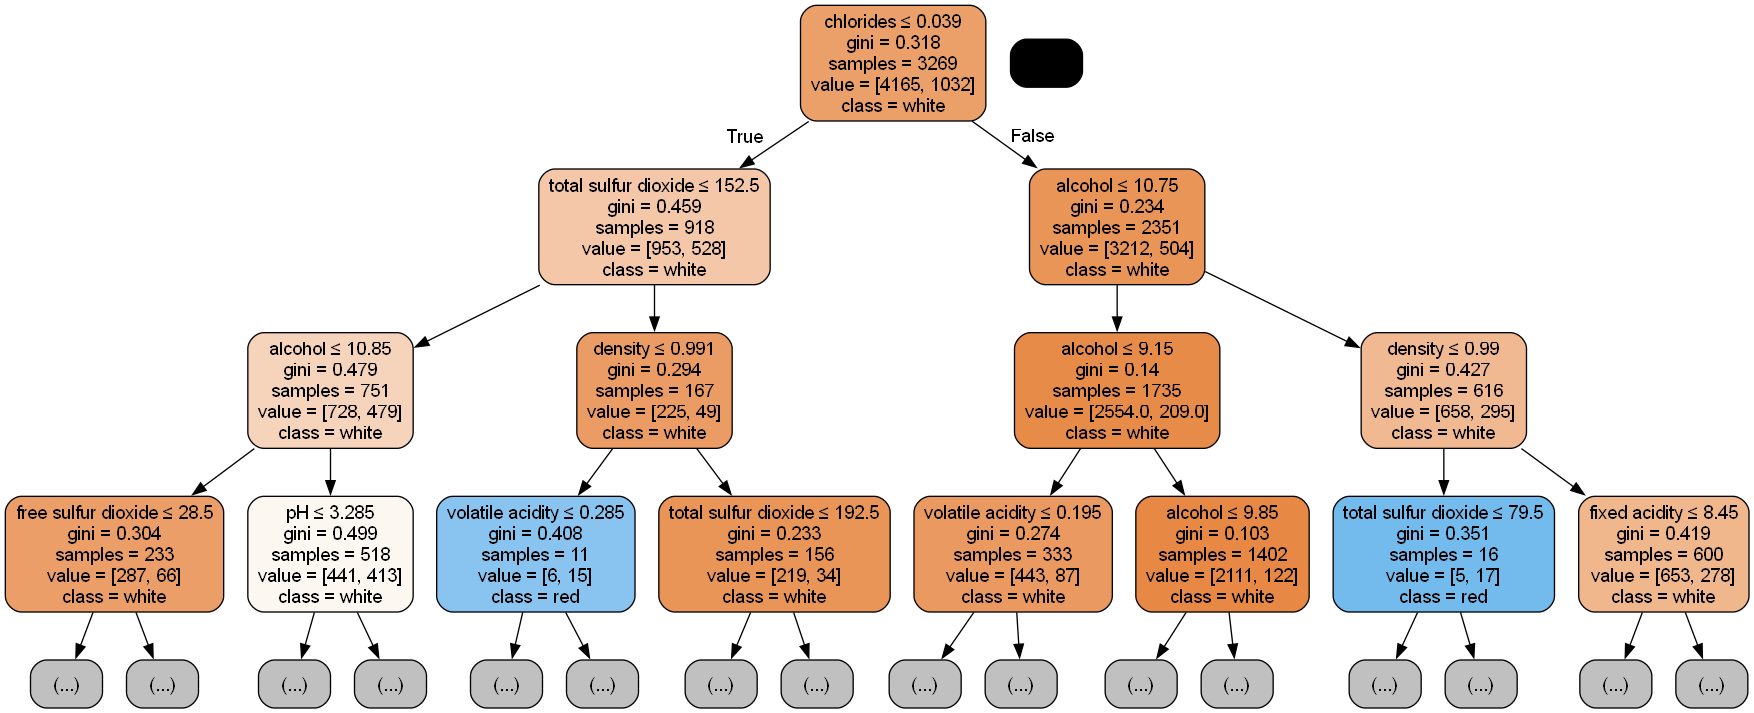

In [40]:
# visualize the first three branches of one of the trees from the random forest
single_tree = rf.best_estimator_.estimators_[0]
show_tree(single_tree, X_train.columns, ['white', 'red'], max_depth=3)

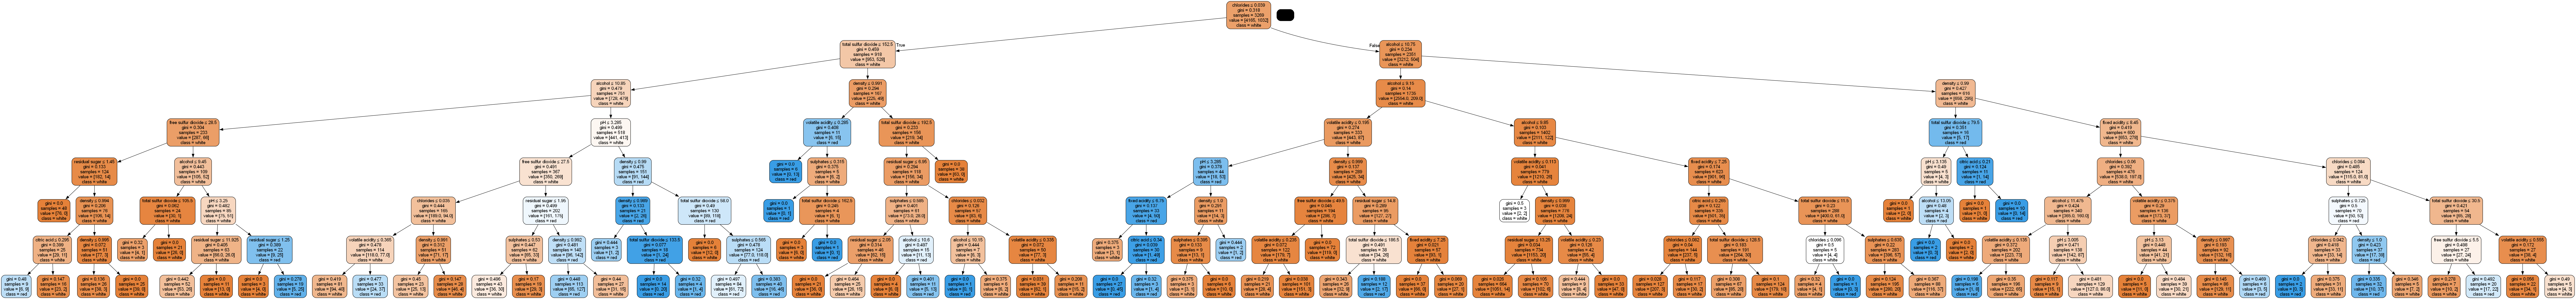

In [41]:
# show the full tree
show_tree(single_tree, X_train.columns, ['white', 'red'], max_depth=100)